### 1.2 Practical 
#### 1.2.1 Linear Regression

In [169]:
## import packages
import pylab as pb
import numpy as np
from math import pi
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import scipy.stats

### A Warmup

#### Question 9:
1. Set the prior distribution over W and visualize it.
2. Pick a single data point(x,t) and visualise the posterior distribution over W.
3. Draw 5 samples from the posterior and plot the resulting functions.
4. Repeat 2 - 3 by adding additional data points up to 7
5. Given the plots explain the effect of adding more data on the posterior as well as the functions. How would you interpret this effect?
6. Finally, test the exercise for different values of $\sigma$ ,c.g. 0.1, 0.4 and 0.8. How does your model account for data with varying noise levels? what is the effect on the posterior?

In [170]:
# Generate X
w_0 = 0.5
w_1 = -1.5
mean = [0]
cov  = [[0.2]]
X = []
t = []
for i in range(201):
    temp_x = -1 + 0.01*i
    X.append(temp_x)
    error = float(np.random.multivariate_normal(mean,cov))
    temp_t = w_0 * temp_x + w_1 + error
    t.append(temp_t)

    
    

Plotting the Prioi Distribution over W0 and W1


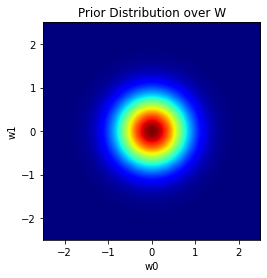

In [171]:
print("Plotting the Prioi Distribution over W0 and W1")
mean     = [0, 0] 
sigma    = 0.2
cov      = [[sigma,0],[0,sigma]]
w_0_list =[]
w_1_list =[]

for i in range(200,-201,-2):
    temp_w0 = mean[0] + i * 0.01
    temp_w1 = mean[1] + i * 0.01
    w_0_list.append(temp_w0)
    w_1_list.append(temp_w1)

w_0_list, w_1_list = np.meshgrid(w_0_list, w_1_list)
prior = scipy.stats.multivariate_normal(mean, cov)
pos = np.empty(w_0_list.shape + (2,))
pos[:, :, 0] = w_0_list
pos[:, :, 1] = w_1_list
p  = prior.pdf(pos)
cs = plt.imshow(p,cmap ='jet',extent=(-2.5, 2.5, -2.5, 2.5))
ax = plt.gca()
ax.grid(False)
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('Prior Distribution over W')
plt.show()


In [172]:
 def plotPosterior(x1,t1,sigma):
    sigma = sigma**0.5
    Sigma = sigma**2 * np.array([[1,0],[0,1]])
    w_0_list =[]
    w_1_list =[]
### plot
    w_0_list, w_1_list = np.mgrid[-2:2:.01, -2:2:.01]
    inv_cov_w = 1/(sigma**2) * np.dot(x1.T,x1) + np.linalg.inv(Sigma)
    cov = np.linalg.inv(inv_cov_w)
    mean_w = 1/(sigma**2) * np.dot(np.dot(cov,x1.T),t1)
    pos = np.empty(w_0_list.shape + (2,))
    pos[:, :, 0] = w_0_list
    pos[:, :, 1] = w_1_list
    p = scipy.stats.multivariate_normal.pdf(pos,mean_w, cov)
    cs = plt.imshow(p,cmap='jet',extent=(-2.5, 2.5, -2.5, 2.5))
    ax = plt.gca()
    ax.grid(False)
    plt.xlabel('w0')
    plt.ylabel('w1')
    plt.title('Posterior distribution over W')
    plt.show()
    return mean_w,cov,p

def samplingPosterior(k,sigma):
    picked_x =[]
    x1 = np.zeros((k,2))
    t1 = [0]*k
    for i in range(k):
        flag = True
        while flag == True:
            num = np.random.randint(0, 200)
            if num not in picked_x:
                picked_x.append(num)
                x1[i][0] = X[num]
                x1[i][1] = 1
                t1[i] = t[num]
                flag = False
            else:
                continue

    mean_w,cov_w,p = plotPosterior(x1,t1,sigma)
    w0,w1 = np.random.multivariate_normal(mean_w, cov_w, 20).T
    y_total = []
    
    plt.figure()
    
    for i in range(20):
        y = []
        for temp_x in X:
            y_temp = w0[i] * temp_x + w1[i] 
            y.append(y_temp)
        
        plt.plot(X,y)
    
    plt.xlim((-1,1))
    plt.ylim((-2.5,2.5))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Data Space with Posterior distribution over W')

### Experiments

k=1,sigma=0.2


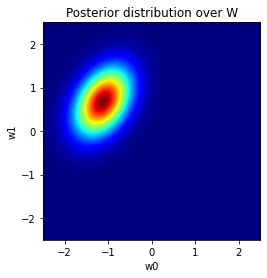

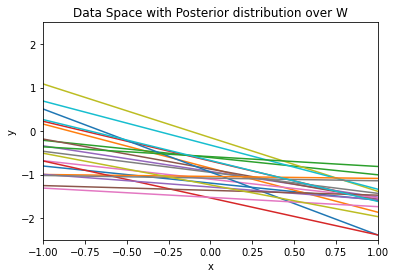

In [173]:
k = 1
sigma = 0.2
print(f"k={k},sigma={sigma}")
samplingPosterior(k,sigma)

k=2,sigma=0.2


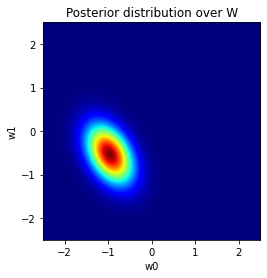

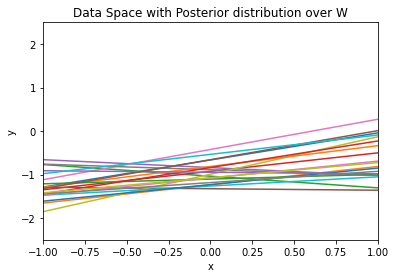

In [174]:
k = 2
sigma = 0.2

print(f"k={k},sigma={sigma}")
samplingPosterior(k,sigma)

k=3,sigma=0.2


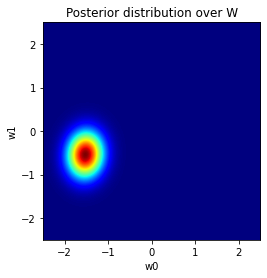

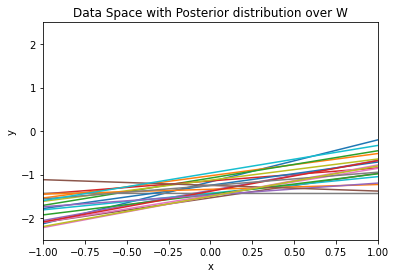

In [175]:
k = 3
sigma = 0.2

print(f"k={k},sigma={sigma}")
samplingPosterior(k,sigma)

k=4,sigma=0.2


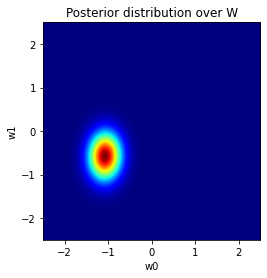

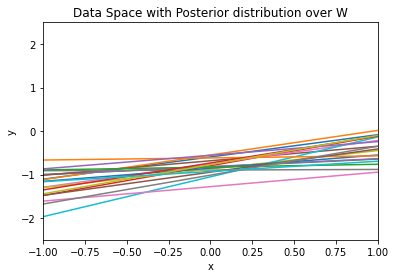

In [176]:
k = 4
sigma = 0.2

print(f"k={k},sigma={sigma}")
samplingPosterior(k,sigma)

k=5,sigma=0.2


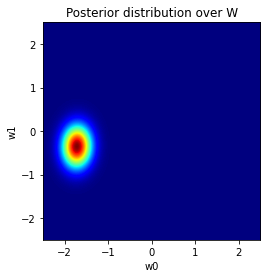

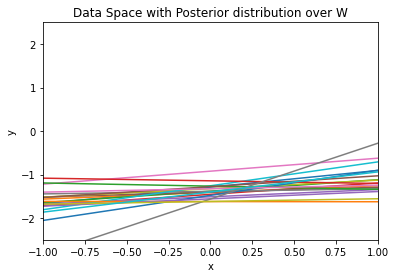

In [177]:
k = 5
sigma = 0.2

print(f"k={k},sigma={sigma}")
samplingPosterior(k,sigma)

k=6,sigma=0.2


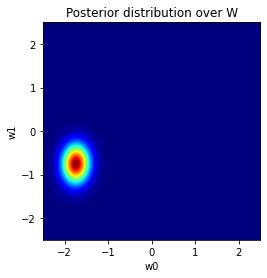

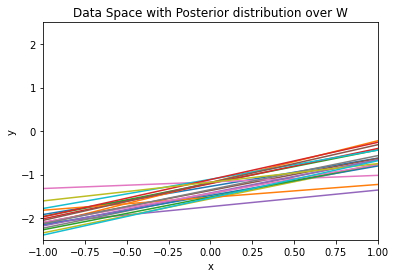

In [178]:
k = 6
sigma = 0.2

print(f"k={k},sigma={sigma}")
samplingPosterior(k,sigma)

k=7,sigma=0.2


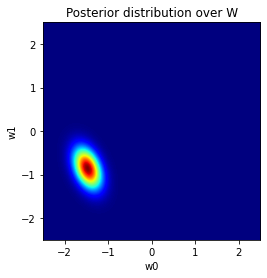

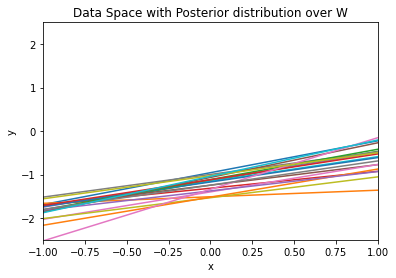

In [179]:
k = 7
sigma = 0.2

print(f"k={k},sigma={sigma}")
samplingPosterior(k,sigma)

### Testing :
* First test with different data sample, k = 1,5,20,100
* Later on test with different sigma , sigma = 0.01,0.1,0.2, 0.4 under same number of data sample

### Some Function For Comparison

In [180]:
def drawDataSpace(ax,mean_w,cov_w,p,numSample=40):
    w0,w1 = np.random.multivariate_normal(mean_w, cov_w, numSample).T
    
    for i in range(numSample):
        y=[]
        for temp_x in X:
            y_temp = w0[i] * temp_x + w1[i] 
            y.append(y_temp)
        ax.plot(X,y)
    ax.xlim((-1,1))
    ax.ylim((-2.5,2.5))
    ax.xlabel('x')
    ax.ylabel('y')
    return ax
            
    

In [181]:
def samplingPosterior2draw(k,sigma):
    picked_x =[]
    x1 = np.zeros((k,2))
    t1 = [0]*k
    for i in range(k):
        flag = True
        while flag == True:
            num = np.random.randint(0, 200)
            if num not in picked_x:
                picked_x.append(num)
                x1[i][0] = X[num]
                x1[i][1] = 1
                t1[i] = t[num]
                flag = False
            else:
                continue
    
    sigma = sigma**0.5
    Sigma = sigma**2 * np.array([[1,0],[0,1]])
    w0List =[]
    w1List =[]
    w0List, w1List = np.mgrid[-2:2:.01, -2:2:.01]
    inv_cov_w = 1/(sigma**2) * np.dot(x1.T,x1) + np.linalg.inv(Sigma)
    cov = np.linalg.inv(inv_cov_w)
    mean_w = 1/(sigma**2) * np.dot(np.dot(cov,x1.T),t1)
    pos = np.empty(w_0_list.shape + (2,))
    pos[:, :, 0] = w_0_list
    pos[:, :, 1] = w_1_list
    p = scipy.stats.multivariate_normal.pdf(pos,mean_w, cov)
    return mean_w,cov,p

## Test with Different sigma 

sigma = 0.01,0.1,0.2, 0.4, 0.8 under k = [1,2,5,10,20,100]

#### sigma = 0.01

sigma = 0.01
Compare Posterior Distribution over W...


<Figure size 432x288 with 0 Axes>

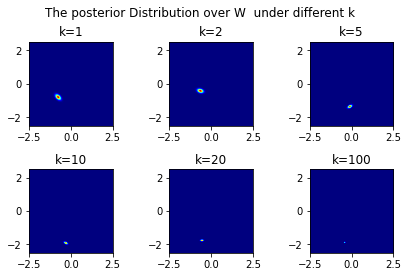

Compare Dataspace...
# k = 1


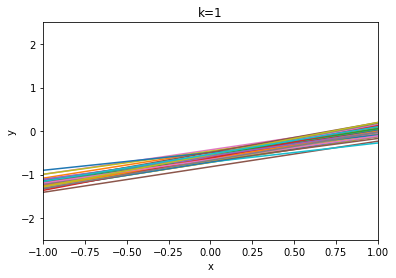

# k = 2


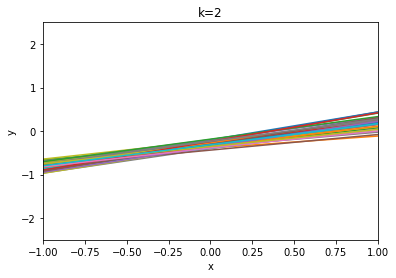

# k = 5


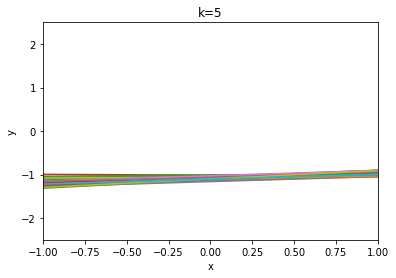

# k = 10


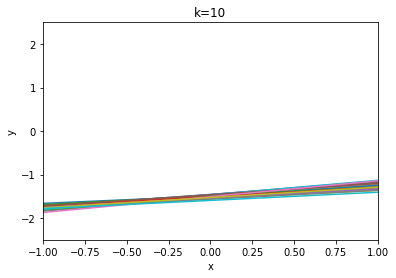

# k = 20


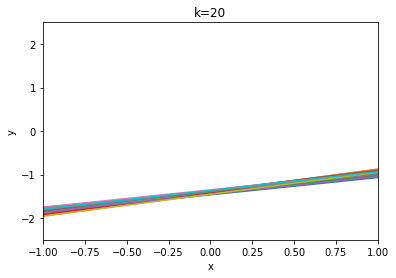

# k = 100


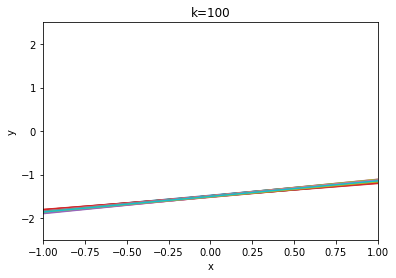

In [182]:
sigma = 0.01
print(f"sigma = {sigma}")
k=[1,2,5,10,20,100]

print("Compare Posterior Distribution over W...")
plt.figure()
# k = 1
f,ax = plt.subplots(2,3)
meank1,covk1,pk1 = samplingPosterior2draw(1,sigma)
ax[0][0].imshow(pk1,cmap='jet',extent=(-2.5, 2.5, -2.5, 2.5))
ax[0][0].set_title("k=1")

# k = 2
meank2,covk2,pk2 = samplingPosterior2draw(2,sigma)
ax[0][1].imshow(pk2,cmap='jet',extent=(-2.5, 2.5, -2.5, 2.5))
ax[0][1].set_title("k=2")

# k = 5
meank5,covk5,pk5 = samplingPosterior2draw(5,sigma)
ax[0][2].imshow(pk5,cmap='jet',extent=(-2.5, 2.5, -2.5, 2.5))
ax[0][2].set_title("k=5")

# k = 10
meank10,covk10,pk10 = samplingPosterior2draw(10,sigma)
ax[1][0].imshow(pk10,cmap='jet',extent=(-2.5, 2.5, -2.5, 2.5))
ax[1][0].set_title("k=10")
# k = 20
meank20,covk20,pk20 = samplingPosterior2draw(20,sigma)
ax[1][1].imshow(pk20,cmap='jet',extent=(-2.5, 2.5, -2.5, 2.5))
ax[1][1].set_title("k=20")
# k = 100
ax[1][2].imshow(pk100,cmap='jet',extent=(-2.5, 2.5, -2.5, 2.5))
ax[1][2].set_title("k=100")
plt.suptitle("The posterior Distribution over W  under different k")
plt.subplots_adjust()
f.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


print("Compare Dataspace...")
print("# k = 1")
fig = plt.figure()
plt = drawDataSpace(plt,meank1,covk1,pk1)
plt.title("k=1")
plt.show()

print("# k = 2")
fig = plt.figure()
plt = drawDataSpace(plt,meank2,covk2,pk2)
plt.title("k=2")
plt.show()

print("# k = 5")
fig = plt.figure()
plt = drawDataSpace(plt,meank5,covk5,pk5)
plt.title("k=5")
plt.show()

print("# k = 10")
fig = plt.figure()
plt = drawDataSpace(plt,meank10,covk10,pk10)
plt.title("k=10")
plt.show()

print("# k = 20")
fig = plt.figure()
plt = drawDataSpace(plt,meank20,covk20,pk20)
plt.title("k=20")
plt.show()

print("# k = 100")
fig = plt.figure()
plt = drawDataSpace(plt,meank100,covk100,pk100)
plt.title("k=100")
plt.show()


#### sigma = 0.1

sigma = 0.1
Compare Posterior Distribution over W...


<Figure size 432x288 with 0 Axes>

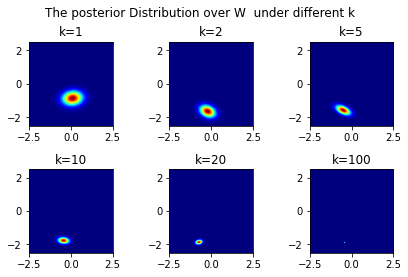

Compare Dataspace...
# k = 1


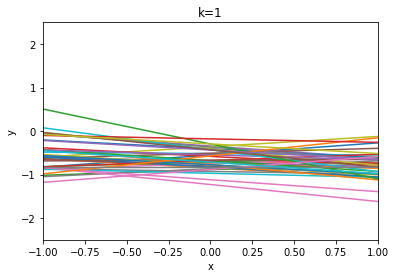

# k = 2


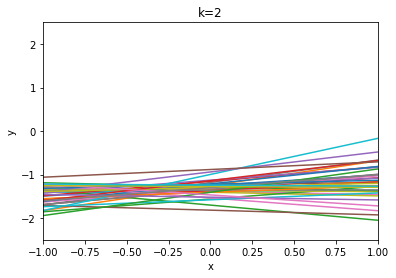

# k = 5


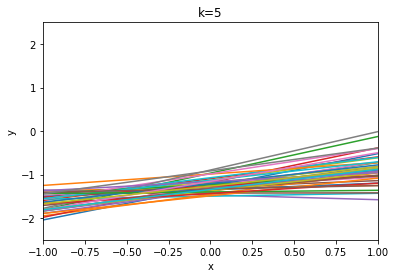

# k = 10


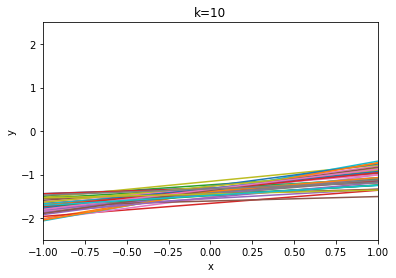

# k = 20


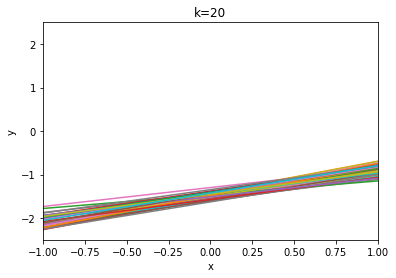

# k = 100


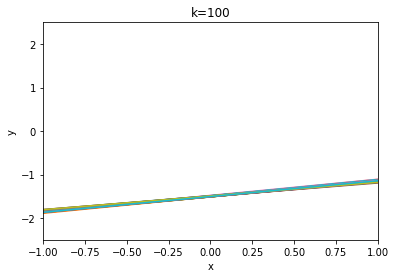

In [183]:
sigma = 0.1
print(f"sigma = {sigma}")
k=[1,2,5,10,20,100]

print("Compare Posterior Distribution over W...")
plt.figure()
# k = 1
f,ax = plt.subplots(2,3)
meank1,covk1,pk1 = samplingPosterior2draw(1,sigma)
ax[0][0].imshow(pk1,cmap='jet',extent=(-2.5, 2.5, -2.5, 2.5))
ax[0][0].set_title("k=1")

# k = 2
meank2,covk2,pk2 = samplingPosterior2draw(2,sigma)
ax[0][1].imshow(pk2,cmap='jet',extent=(-2.5, 2.5, -2.5, 2.5))
ax[0][1].set_title("k=2")

# k = 5
meank5,covk5,pk5 = samplingPosterior2draw(5,sigma)
ax[0][2].imshow(pk5,cmap='jet',extent=(-2.5, 2.5, -2.5, 2.5))
ax[0][2].set_title("k=5")

# k = 10
meank10,covk10,pk10 = samplingPosterior2draw(10,sigma)
ax[1][0].imshow(pk10,cmap='jet',extent=(-2.5, 2.5, -2.5, 2.5))
ax[1][0].set_title("k=10")
# k = 20
meank20,covk20,pk20 = samplingPosterior2draw(20,sigma)
ax[1][1].imshow(pk20,cmap='jet',extent=(-2.5, 2.5, -2.5, 2.5))
ax[1][1].set_title("k=20")
# k = 100
ax[1][2].imshow(pk100,cmap='jet',extent=(-2.5, 2.5, -2.5, 2.5))
ax[1][2].set_title("k=100")
plt.suptitle("The posterior Distribution over W  under different k")
plt.subplots_adjust()
f.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


print("Compare Dataspace...")
print("# k = 1")
fig = plt.figure()
plt = drawDataSpace(plt,meank1,covk1,pk1)
plt.title("k=1")
plt.show()

print("# k = 2")
fig = plt.figure()
plt = drawDataSpace(plt,meank2,covk2,pk2)
plt.title("k=2")
plt.show()

print("# k = 5")
fig = plt.figure()
plt = drawDataSpace(plt,meank5,covk5,pk5)
plt.title("k=5")
plt.show()

print("# k = 10")
fig = plt.figure()
plt = drawDataSpace(plt,meank10,covk10,pk10)
plt.title("k=10")
plt.show()

print("# k = 20")
fig = plt.figure()
plt = drawDataSpace(plt,meank20,covk20,pk20)
plt.title("k=20")
plt.show()

print("# k = 100")
fig = plt.figure()
plt = drawDataSpace(plt,meank100,covk100,pk100)
plt.title("k=100")
plt.show()


#### sigma = 0.2

sigma = 0.2
Compare Posterior Distribution over W...


<Figure size 432x288 with 0 Axes>

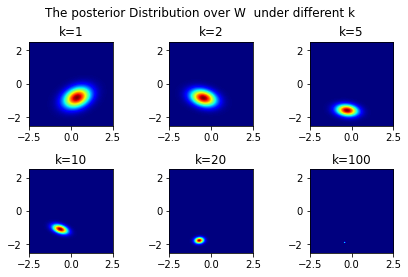

Compare Dataspace...
# k = 1


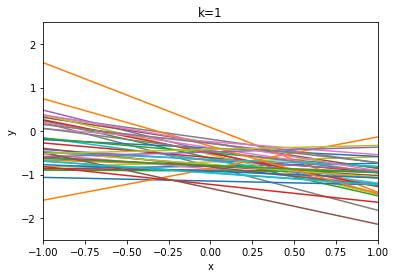

# k = 2


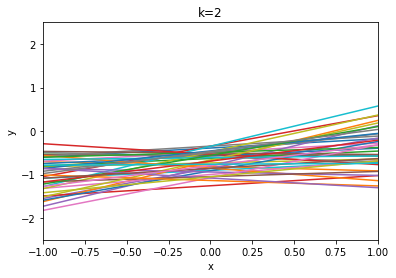

# k = 5


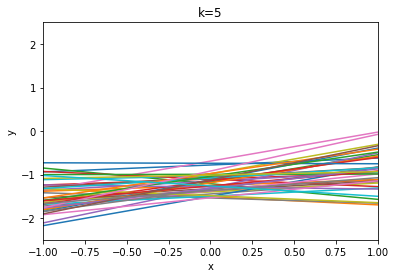

# k = 10


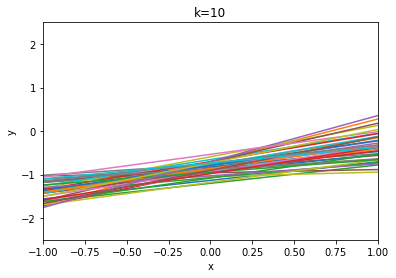

# k = 20


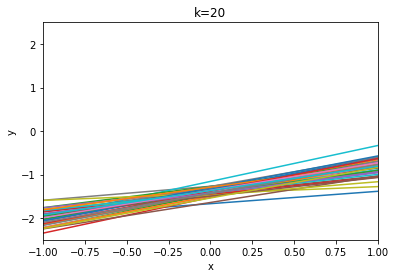

# k = 100


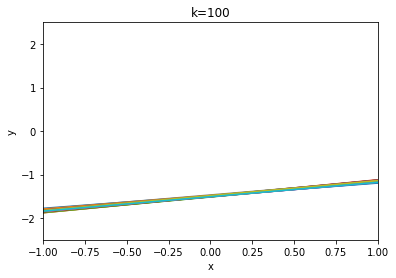

In [184]:
sigma = 0.2
print(f"sigma = {sigma}")
k=[1,2,5,10,20,100]

print("Compare Posterior Distribution over W...")
plt.figure()
# k = 1
f,ax = plt.subplots(2,3)
meank1,covk1,pk1 = samplingPosterior2draw(1,sigma)
ax[0][0].imshow(pk1,cmap='jet',extent=(-2.5, 2.5, -2.5, 2.5))
ax[0][0].set_title("k=1")

# k = 2
meank2,covk2,pk2 = samplingPosterior2draw(2,sigma)
ax[0][1].imshow(pk2,cmap='jet',extent=(-2.5, 2.5, -2.5, 2.5))
ax[0][1].set_title("k=2")

# k = 5
meank5,covk5,pk5 = samplingPosterior2draw(5,sigma)
ax[0][2].imshow(pk5,cmap='jet',extent=(-2.5, 2.5, -2.5, 2.5))
ax[0][2].set_title("k=5")

# k = 10
meank10,covk10,pk10 = samplingPosterior2draw(10,sigma)
ax[1][0].imshow(pk10,cmap='jet',extent=(-2.5, 2.5, -2.5, 2.5))
ax[1][0].set_title("k=10")
# k = 20
meank20,covk20,pk20 = samplingPosterior2draw(20,sigma)
ax[1][1].imshow(pk20,cmap='jet',extent=(-2.5, 2.5, -2.5, 2.5))
ax[1][1].set_title("k=20")
# k = 100
ax[1][2].imshow(pk100,cmap='jet',extent=(-2.5, 2.5, -2.5, 2.5))
ax[1][2].set_title("k=100")
plt.suptitle("The posterior Distribution over W  under different k")
plt.subplots_adjust()
f.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


print("Compare Dataspace...")
print("# k = 1")
fig = plt.figure()
plt = drawDataSpace(plt,meank1,covk1,pk1)
plt.title("k=1")
plt.show()

print("# k = 2")
fig = plt.figure()
plt = drawDataSpace(plt,meank2,covk2,pk2)
plt.title("k=2")
plt.show()

print("# k = 5")
fig = plt.figure()
plt = drawDataSpace(plt,meank5,covk5,pk5)
plt.title("k=5")
plt.show()

print("# k = 10")
fig = plt.figure()
plt = drawDataSpace(plt,meank10,covk10,pk10)
plt.title("k=10")
plt.show()

print("# k = 20")
fig = plt.figure()
plt = drawDataSpace(plt,meank20,covk20,pk20)
plt.title("k=20")
plt.show()

print("# k = 100")
fig = plt.figure()
plt = drawDataSpace(plt,meank100,covk100,pk100)
plt.title("k=100")
plt.show()


#### sigma = 0.4

sigma = 0.4
Compare Posterior Distribution over W...


<Figure size 432x288 with 0 Axes>

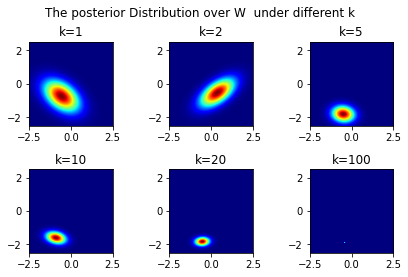

Compare Dataspace...
# k = 1


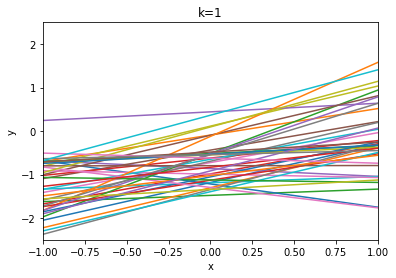

# k = 2


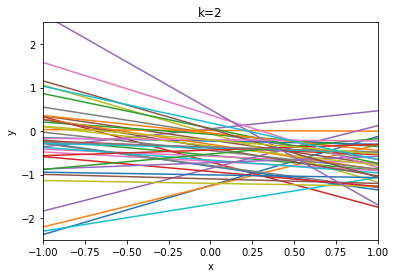

# k = 5


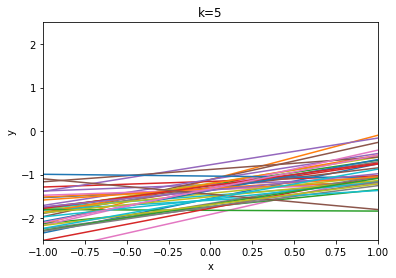

# k = 10


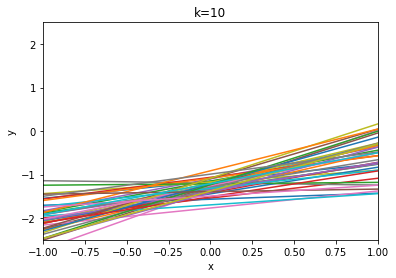

# k = 20


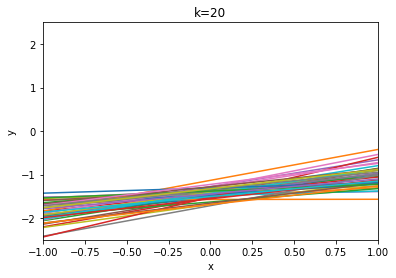

# k = 100


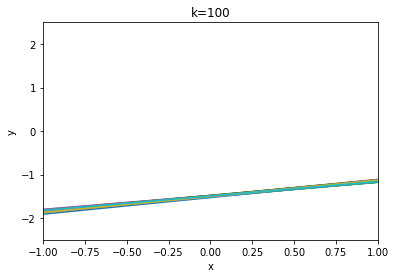

In [185]:
sigma = 0.4
print(f"sigma = {sigma}")
k=[1,2,5,10,20,100]

print("Compare Posterior Distribution over W...")
plt.figure()
# k = 1
f,ax = plt.subplots(2,3)
meank1,covk1,pk1 = samplingPosterior2draw(1,sigma)
ax[0][0].imshow(pk1,cmap='jet',extent=(-2.5, 2.5, -2.5, 2.5))
ax[0][0].set_title("k=1")

# k = 2
meank2,covk2,pk2 = samplingPosterior2draw(2,sigma)
ax[0][1].imshow(pk2,cmap='jet',extent=(-2.5, 2.5, -2.5, 2.5))
ax[0][1].set_title("k=2")

# k = 5
meank5,covk5,pk5 = samplingPosterior2draw(5,sigma)
ax[0][2].imshow(pk5,cmap='jet',extent=(-2.5, 2.5, -2.5, 2.5))
ax[0][2].set_title("k=5")

# k = 10
meank10,covk10,pk10 = samplingPosterior2draw(10,sigma)
ax[1][0].imshow(pk10,cmap='jet',extent=(-2.5, 2.5, -2.5, 2.5))
ax[1][0].set_title("k=10")
# k = 20
meank20,covk20,pk20 = samplingPosterior2draw(20,sigma)
ax[1][1].imshow(pk20,cmap='jet',extent=(-2.5, 2.5, -2.5, 2.5))
ax[1][1].set_title("k=20")
# k = 100
ax[1][2].imshow(pk100,cmap='jet',extent=(-2.5, 2.5, -2.5, 2.5))
ax[1][2].set_title("k=100")
plt.suptitle("The posterior Distribution over W  under different k")
plt.subplots_adjust()
f.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


print("Compare Dataspace...")
print("# k = 1")
fig = plt.figure()
plt = drawDataSpace(plt,meank1,covk1,pk1)
plt.title("k=1")
plt.show()

print("# k = 2")
fig = plt.figure()
plt = drawDataSpace(plt,meank2,covk2,pk2)
plt.title("k=2")
plt.show()

print("# k = 5")
fig = plt.figure()
plt = drawDataSpace(plt,meank5,covk5,pk5)
plt.title("k=5")
plt.show()

print("# k = 10")
fig = plt.figure()
plt = drawDataSpace(plt,meank10,covk10,pk10)
plt.title("k=10")
plt.show()

print("# k = 20")
fig = plt.figure()
plt = drawDataSpace(plt,meank20,covk20,pk20)
plt.title("k=20")
plt.show()

print("# k = 100")
fig = plt.figure()
plt = drawDataSpace(plt,meank100,covk100,pk100)
plt.title("k=100")
plt.show()


#### sigma = 0.8

sigma = 0.8
Compare Posterior Distribution over W...


<Figure size 432x288 with 0 Axes>

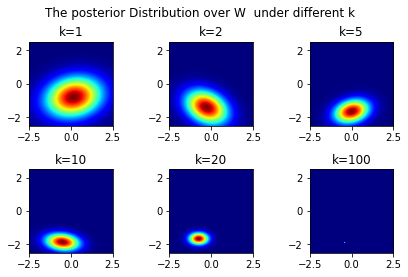

Compare Dataspace...
# k = 1


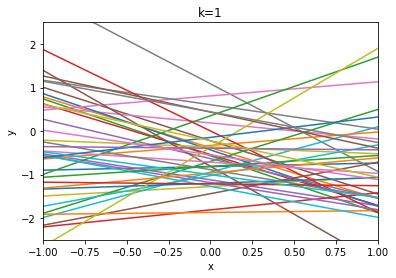

# k = 2


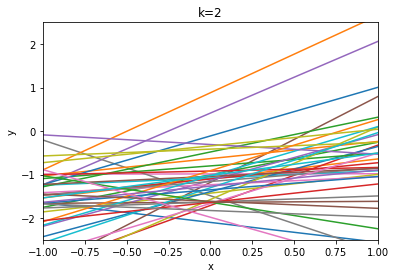

# k = 5


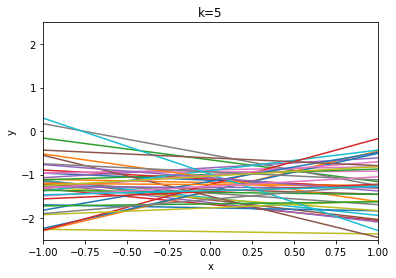

# k = 10


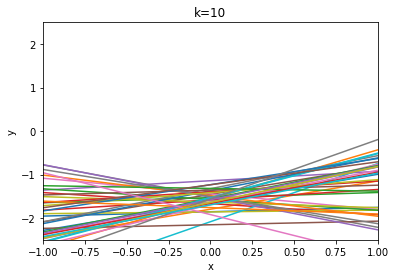

# k = 20


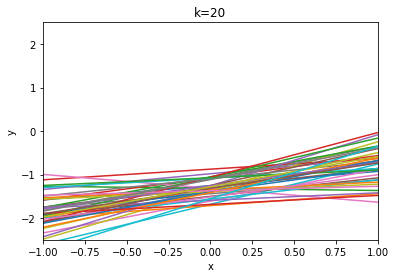

# k = 100


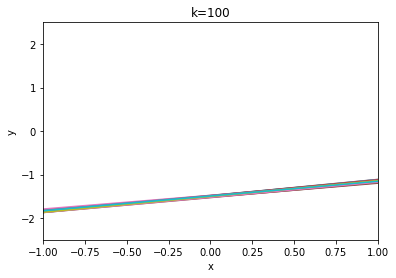

In [186]:
sigma = 0.8
print(f"sigma = {sigma}")
k=[1,2,5,10,20,100]

print("Compare Posterior Distribution over W...")
plt.figure()
# k = 1
f,ax = plt.subplots(2,3)
meank1,covk1,pk1 = samplingPosterior2draw(1,sigma)
ax[0][0].imshow(pk1,cmap='jet',extent=(-2.5, 2.5, -2.5, 2.5))
ax[0][0].set_title("k=1")

# k = 2
meank2,covk2,pk2 = samplingPosterior2draw(2,sigma)
ax[0][1].imshow(pk2,cmap='jet',extent=(-2.5, 2.5, -2.5, 2.5))
ax[0][1].set_title("k=2")

# k = 5
meank5,covk5,pk5 = samplingPosterior2draw(5,sigma)
ax[0][2].imshow(pk5,cmap='jet',extent=(-2.5, 2.5, -2.5, 2.5))
ax[0][2].set_title("k=5")

# k = 10
meank10,covk10,pk10 = samplingPosterior2draw(10,sigma)
ax[1][0].imshow(pk10,cmap='jet',extent=(-2.5, 2.5, -2.5, 2.5))
ax[1][0].set_title("k=10")
# k = 20
meank20,covk20,pk20 = samplingPosterior2draw(20,sigma)
ax[1][1].imshow(pk20,cmap='jet',extent=(-2.5, 2.5, -2.5, 2.5))
ax[1][1].set_title("k=20")
# k = 100
ax[1][2].imshow(pk100,cmap='jet',extent=(-2.5, 2.5, -2.5, 2.5))
ax[1][2].set_title("k=100")
plt.suptitle("The posterior Distribution over W  under different k")
plt.subplots_adjust()
f.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


print("Compare Dataspace...")
print("# k = 1")
fig = plt.figure()
plt = drawDataSpace(plt,meank1,covk1,pk1)
plt.title("k=1")
plt.show()

print("# k = 2")
fig = plt.figure()
plt = drawDataSpace(plt,meank2,covk2,pk2)
plt.title("k=2")
plt.show()

print("# k = 5")
fig = plt.figure()
plt = drawDataSpace(plt,meank5,covk5,pk5)
plt.title("k=5")
plt.show()

print("# k = 10")
fig = plt.figure()
plt = drawDataSpace(plt,meank10,covk10,pk10)
plt.title("k=10")
plt.show()

print("# k = 20")
fig = plt.figure()
plt = drawDataSpace(plt,meank20,covk20,pk20)
plt.title("k=20")
plt.show()

print("# k = 100")
fig = plt.figure()
plt = drawDataSpace(plt,meank100,covk100,pk100)
plt.title("k=100")
plt.show()
